In [1]:
import pandas as pd
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [2]:
data = pd.read_csv('/home/ryley/WDK/ML/dataset/komega_phll.csv')
data.describe()

,Unnamed: 0,komega_skewness,komega_I1_1,komega_I1_2,komega_I1_3,komega_I1_4,komega_I1_5,komega_I1_6,komega_I1_7,komega_I1_8,...,DNS_nut_nnls,DNS_aperp_nnls_11,DNS_aperp_nnls_12,DNS_aperp_nnls_13,DNS_aperp_nnls_21,DNS_aperp_nnls_22,DNS_aperp_nnls_23,DNS_aperp_nnls_31,DNS_aperp_nnls_32,DNS_aperp_nnls_33
count,73755.000000,7.375500e+04,7.375500e+04,7.375500e+04,7.375500e+04,7.375500e+04,7.375500e+04,7.375500e+04,7.375500e+04,7.375500e+04,...,73755.000000,73755.000000,7.375500e+04,7.375500e+04,7.375500e+04,73755.000000,7.375500e+04,7.375500e+04,7.375500e+04,7.375500e+04
mean,7375.000000,1.971466e-02,3.068487e-02,1.740011e-04,-2.588264e-02,-1.316727e-01,-6.633677e-02,-1.309957e-04,-2.947410e-04,-2.044707e-08,...,0.000443,0.000006,-1.346491e-06,-1.000912e-09,-1.346491e-06,-0.000006,1.474276e-08,-1.000912e-09,1.474276e-08,-9.614726e-08
std,4258.275768,4.456023e-02,2.384632e-02,3.749081e-04,1.860595e-02,2.754842e-01,6.723408e-02,2.403747e-04,3.038663e-04,1.049147e-05,...,0.000655,0.000006,3.400717e-06,5.563567e-08,3.400717e-06,0.000004,2.004706e-07,5.563567e-08,2.004706e-07,5.788796e-06
min,0.000000,3.783190e-07,4.517260e-12,-1.141900e-04,-8.289480e-02,-2.827870e+00,-4.749800e-01,-1.410640e-03,-1.642060e-03,-5.596050e-05,...,0.000000,-0.000033,-1.924129e-05,-8.823653e-07,-1.924129e-05,-0.000037,-5.453834e-06,-8.823653e-07,-5.453834e-06,-1.346950e-05
25%,3687.000000,1.833620e-03,1.009275e-02,-5.058515e-12,-4.112380e-02,-1.216685e-01,-1.204905e-01,-1.354725e-04,-5.296445e-04,-1.746550e-06,...,0.000002,0.000002,-2.895121e-06,-2.157575e-09,-2.895121e-06,-0.000008,-1.492178e-08,-2.157575e-09,-1.492178e-08,-3.074900e-06
50%,7375.000000,3.919650e-03,2.669840e-02,6.336220e-07,-2.438030e-02,-2.802260e-02,-4.083070e-02,-2.061810e-07,-1.677740e-04,-8.517450e-30,...,0.000161,0.000005,-5.947127e-07,0.000000e+00,-5.947127e-07,-0.000005,0.000000e+00,0.000000e+00,0.000000e+00,-9.642620e-07
75%,11063.000000,1.535625e-02,4.803390e-02,1.518360e-04,-9.483385e-03,-8.442980e-03,-5.877050e-03,1.534005e-15,-3.004365e-05,1.747365e-06,...,0.000777,0.000009,5.271358e-07,2.796386e-09,5.271358e-07,-0.000002,2.366775e-08,2.796386e-09,2.366775e-08,6.585835e-07
max,14750.000000,6.621850e-01,1.547490e-01,5.550150e-03,-1.004100e-12,-6.662420e-11,-1.161670e-12,5.652990e-05,-5.111120e-24,5.468210e-05,...,0.033282,0.000049,2.932348e-05,8.083443e-07,2.932348e-05,0.000004,3.221743e-06,8.083443e-07,3.221743e-06,5.938810e-05


In [3]:
####### Pseudocode
# Load csv dataset
# Determine validation set
# Split dataset into training/validation features/labels
# Initialize DataLoader
# For each epoch:
#    For each batch:
#        Training code
#        Evaluate on CV set

In [7]:
df = pd.read_csv('/home/ryley/WDK/ML/dataset/komega_phll.csv')


In [11]:
%%time
# GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print(f'Device: {device}')
# NN hyperparameters
n_epochs = 50
input_features = ['komega_I1_1', 'komega_I1_2', 'komega_I1_3']
labels = ['DNS_b_11','DNS_b_12']

# Model creation
model = nn.Sequential(
    nn.Linear(3, 60),
    nn.ReLU(),
    nn.Linear(60, 30),
    nn.ReLU(),
    nn.Linear(30, 2),
    nn.Sigmoid()
).to(device)

# Training parameters
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Data hyperparameters
val_case = 'case_1p2'
X_train = df[df['Case'] != val_case][input_features]
y_train = df[df['Case'] != val_case][labels]

class TurbDataset(Dataset):
    def __init__(self, filename, input_features, labels):
        # convert into PyTorch tensors and remember them
        self.filename=filename
        df = pd.read_csv(self.filename)
        
        self.X = torch.from_numpy( df[input_features].values.astype(np.float32)).to(device)
        self.y = torch.from_numpy( df[labels].values.astype(np.float32)).to(device)

        del df
 
    def __len__(self):
        # this should return the size of the dataset
        return len(self.X)
 
    def __getitem__(self, idx):
        # this should return one sample from the dataset
        features = self.X[idx]
        target = self.y[idx]
        return features, target

tDs = TurbDataset(filename='/home/ryley/WDK/ML/dataset/komega_phll.csv',input_features=input_features,labels=labels)
loader = DataLoader(tDs, shuffle=True, batch_size=16)

torch.cuda.synchronize()
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Device: cuda:0
CPU times: user 3min 28s, sys: 2.36 s, total: 3min 31s
Wall time: 3min 11s


In [29]:
# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.astype(np.float32).values)
        self.y = torch.tensor(y.astype(np.float32).values)
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len

loader = DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=16)
batch_size = 64
data_train = data[data['Case'] == 'case_1p0']
data_test = data[data['Case'] == 'case_1p2']

input_features = ['komega_I1_1', 'komega_I1_2', 'komega_I1_3']
labels = ['DNS_b_11']
X_train = data_train[input_features]
y_train = data_train[labels]

X_test = data_test[input_features]
y_test = data_test[labels]

# Instantiate training and test data
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

In [30]:
import torch
from torch import nn
from torch import optim


class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleMLP, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.sigmoid(self.layer_2(x))

        return x

In [34]:
input_dim = 3
hidden_dim = 10
output_dim = 1

model = SimpleMLP(input_dim, hidden_dim, output_dim)
print(model)

SimpleMLP(
  (layer_1): Linear(in_features=3, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


In [38]:
learning_rate = 0.01

loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [39]:
# Training loop
num_epochs = 100
loss_values = []

for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print("Training Complete")

/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([64, 1, 1])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/ryley/WDK/ML/code/training/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([31, 1, 1])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Training Complete


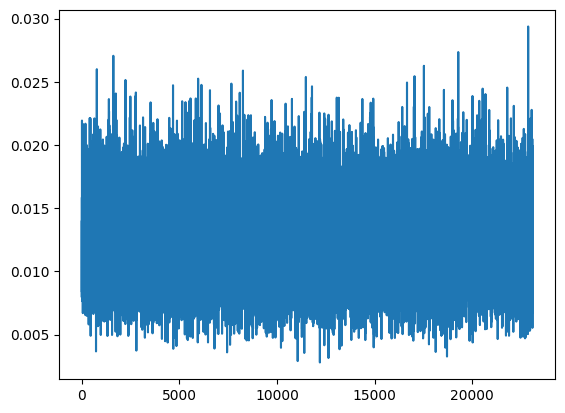

In [40]:
import matplotlib.pyplot as plt
plt.plot(loss_values)